##### Connect with google drive - data (files with images)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Tutaj podajemy wszystkie importy

In [3]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import skimage
import skimage.io
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import PIL
import PIL.Image
import os

##### Tutaj podajemy wszystkie stałe

In [4]:
root_directory = "/content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/data/"

##### Load and analyze data
- MH: motorcycle/MG_20220314_171344.jpg
- DK: motorcycle/20220313_154628.jpg
- ME: motorcycle/20220318_150856.jpg
- baza z neta: /content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/BAZA_Z_NETA/motorcycle/ZXPHI9H0KJ8I.jpg

Image from MH annotator
Image Dimension    :  (2976, 2976, 3)
Image Height       :  2976
Image Width        :  2976
Number of Channels :  3


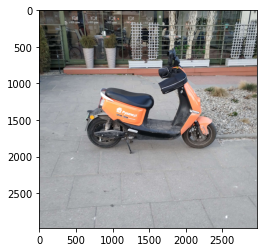

In [7]:
imageMH = skimage.io.imread(fname=root_directory+"motorcycle/IMG_20220314_171344.jpg")
plt.imshow(imageMH);
print("Image from MH annotator")
print('Image Dimension    : ',imageMH.shape)
print('Image Height       : ',imageMH.shape[0])
print('Image Width        : ',imageMH.shape[1])
print('Number of Channels : ',imageMH.shape[2])

Image from DK annotator
Image Dimension    :  (3024, 3024, 3)
Image Height       :  3024
Image Width        :  3024
Number of Channels :  3


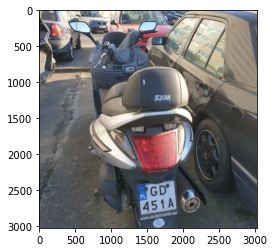

In [8]:
imageDK = skimage.io.imread(fname=root_directory+"motorcycle/20220313_154628.jpg")
plt.imshow(imageDK);
print("Image from DK annotator")
print('Image Dimension    : ',imageDK.shape)
print('Image Height       : ',imageDK.shape[0])
print('Image Width        : ',imageDK.shape[1])
print('Number of Channels : ',imageDK.shape[2])

Image from ME annotator
Image Dimension    :  (4240, 4240, 3)
Image Height       :  4240
Image Width        :  4240
Number of Channels :  3


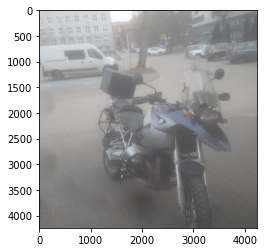

In [9]:
imageME = skimage.io.imread(fname=root_directory+"motorcycle/20220318_150856.jpg")
plt.imshow(imageME);
print("Image from ME annotator")
print('Image Dimension    : ',imageME.shape)
print('Image Height       : ',imageME.shape[0])
print('Image Width        : ',imageME.shape[1])
print('Number of Channels : ',imageME.shape[2])

Image from internet database
Image Dimension    :  (256, 256, 3)
Image Height       :  256
Image Width        :  256
Number of Channels :  3


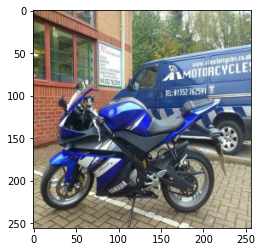

In [6]:
imageNETDATABASE = skimage.io.imread(fname="/content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/BAZA_Z_NETA/motorcycle/ZXPHI9H0KJ8I.jpg")
plt.imshow(imageNETDATABASE);
print("Image from internet database")
print('Image Dimension    : ',imageNETDATABASE.shape)
print('Image Height       : ',imageNETDATABASE.shape[0])
print('Image Width        : ',imageNETDATABASE.shape[1])
print('Number of Channels : ',imageNETDATABASE.shape[2])

##### Professional analysis

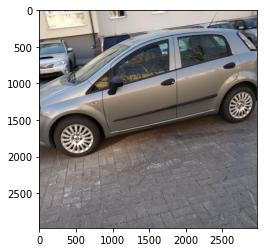

In [ ]:
image = skimage.io.imread(fname=root_directory+"car/IMG_20220312_124812.jpg")
plt.imshow(image);

In [ ]:
print('Image Dimension    : ',image.shape)
print('Image Height       : ',image.shape[0])
print('Image Width        : ',image.shape[1])
print('Number of Channels : ',image.shape[2])
#print(image.shape)
print("Image as a matrix of pixels: ")
print(image)

Image Dimension    :  (2976, 2976, 3)
Image Height       :  2976
Image Width        :  2976
Number of Channels :  3
Image as a matrix of pixels: 
[[[212 209 200]
  [212 209 200]
  [212 210 198]
  ...
  [175 167 164]
  [178 170 167]
  [180 172 169]]

 [[212 209 200]
  [212 209 200]
  [212 210 198]
  ...
  [178 170 167]
  [179 171 168]
  [180 172 169]]

 [[212 210 198]
  [212 210 198]
  [212 210 198]
  ...
  [182 174 171]
  [181 173 170]
  [181 173 170]]

 ...

 [[111 110 115]
  [111 110 115]
  [111 110 115]
  ...
  [ 84  84  84]
  [ 95  95  95]
  [103 103 103]]

 [[108 107 112]
  [108 107 112]
  [109 108 113]
  ...
  [ 92  92  92]
  [ 99  99  99]
  [105 105 105]]

 [[107 106 111]
  [107 106 111]
  [108 107 112]
  ...
  [103 103 103]
  [108 108 108]
  [112 112 112]]]


### Tensorflow in images

In [ ]:
def decode_image(filename, image_type, resize_shape, channels):
  """
  Parameters
  ----------
  filename : str
      name of the file, eg. root_directory + "car/IMG_20220312_124812.jpg"
  image_type : str
      'jpeg', 'png' or 'not known'
  resize_shape : tuple???
      shape of new image after resizing
  channels: int
      number of channels to proceed with (3 is RGB)
  """

  value = tf.io.read_file(filename)
  if image_type == 'png':
    decoded_image = tf.image.decode_png(value, channels=channels)
  elif image_type == 'jpeg':
    decoded_image = tf.image.decode_jpeg(value, channels=channels)
  else:
    decoded_image = tf.image.decode_image(value, channels=channels)

  if resize_shape is not None and image_type in ['png', 'jpeg']:
    decoded_image = tf.image.resize(decoded_image, resize_shape)

  return decoded_image

In [ ]:
print(decode_image.__doc__)


  Parameters
  ----------
  filename : str
      name of the file, eg. root_directory + "car/IMG_20220312_124812.jpg"
  image_type : str
      'jpeg', 'png' or 'not known'
  resize_shape : tuple???
      shape of new image after resizing
  channels: int
      number of channels to proceed with (3 is RGB)
  


In [ ]:
encoded_image = tf.io.read_file(root_directory + "car/IMG_20220312_124812.jpg")
print(encoded_image)

decoded_image = decode_image(filename = root_directory + "car/IMG_20220312_124812.jpg", 
                              image_type = 'not known',
                              resize_shape = None, 
                              channels = 3)
print("Decoded image shape: ")
print(decoded_image.shape)
#print(decoded_image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
resized_image = decode_image(filename = root_directory + "car/IMG_20220312_124812.jpg", 
                             image_type = 'not known',
                             resize_shape = (2500, 2500, 3), 
                             channels = 3)
print(resized_image.shape)

(2976, 2976, 3)


In [ ]:
def get_dataset(image_paths, image_type, resize_shape, channels):
    filename_tensor = tf.constant(image_paths)
    dataset = tf.data.Dataset.from_tensor_slices(filename_tensor)
    
    def _map_fn(filename):
        decode_images = decode_image(filename, image_type, resize_shape, channels=channels)
        return decode_images
    
    map_dataset = dataset.map(_map_fn) # we use the map method: allow to apply the function _map_fn to all the 
    # elements of dataset 
    return map_dataset

OpenCV image scaling

In [ ]:
?cv2.imread

In [ ]:
img = cv2.imread(root_directory + "car/IMG_20220312_124812.jpg", 3)
#img = resized_image
cv2_imshow(img)

img_stretch = cv2.resize(img, (2500, 2500))

cv2_imshow(img_stretch)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# Ładowanie i wstępne przetwarzanie obrazów
https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
import pathlib
dataset_url = root_directory
#data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='data')
data_dir = pathlib.Path(root_directory)
data_dir

PosixPath('/content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/data')

Łączna liczba obrazów: 

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print("jpg images: ", image_count)
image_count = len(list(data_dir.glob('*/*.*')))
print("all images: ", image_count)

jpg images:  736
all images:  736


Liczba obrazów dla poszczególnych klas

In [ ]:
class_names = ['TRUDNOSC_Z_PRZYPISANIEM', 'bicycle', 'bus', 'car', 'motorcycle', 'truck']

In [ ]:
data_dir

PosixPath('/content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/data')

In [ ]:
print("Liczba obrazów dla poszczególnych klas")
for class_name in class_names:
  dir = class_name + '/*.jpg'
  image_count = len(list(data_dir.glob(dir)))
  print(class_name, ':', image_count)

Liczba obrazów dla poszczególnych klas
TRUDNOSC_Z_PRZYPISANIEM : 17
bicycle : 66
bus : 46
car : 488
motorcycle : 50
truck : 69


Każdy katalog zawiera obrazy danego typu pojazdów: 

In [ ]:
trucks = list(data_dir.glob('truck/*'))
PIL.Image.open(str(trucks[1]))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
buses = list(data_dir.glob('bus/*'))
PIL.Image.open(str(buses[5]))

Output hidden; open in https://colab.research.google.com to view.

TODO: data augmentation (dla wszystkich klas prócz "car")
https://www.tensorflow.org/tutorials/images/data_augmentation

Załaduj dane za pomocą narzędzia Keras

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 305 files belonging to 6 classes.
Using 244 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 305 files belonging to 6 classes.
Using 61 files for validation.


Nazwy klas można znaleźć w atrybucie class_names w tych zestawach danych.

In [ ]:
class_names = train_ds.class_names
print(class_names)

['TRUDNOSC_Z_PRZYPISANIEM', 'bicycle', 'bus', 'car', 'motorcycle', 'truck']


Wizualizacja danych

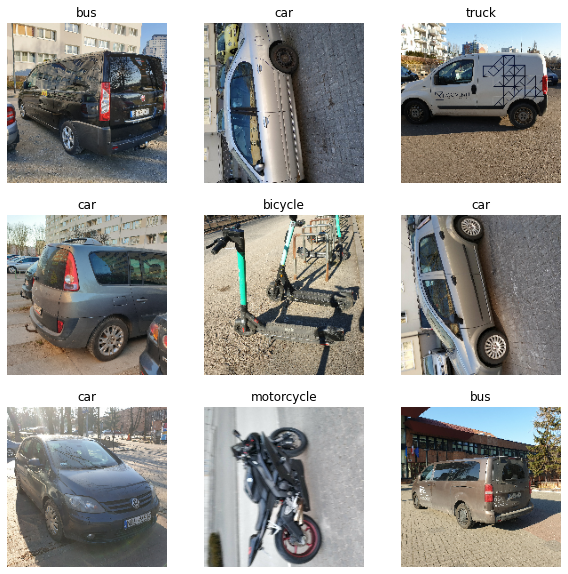

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
# Notice the pixel values range: 
print(np.min(image_batch[0]), np.max(image_batch[0]))

Standardyzacja danych
- Tutaj ustandaryzujesz wartości tak, aby mieściły się w zakresie [0, 1], używając tf.keras.layers.Rescaling

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


Skonfiguruj zbiór danych pod kątem wydajności

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Wytrenuj model

In [ ]:
num_classes = 6

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
8/8 [==============================] - 42s 4s/step - loss: 1.7340 - accuracy: 0.3852 - val_loss: 1.4356 - val_accuracy: 0.5246
Epoch 2/3
8/8 [==============================] - 9s 1s/step - loss: 1.4697 - accuracy: 0.5041 - val_loss: 1.3563 - val_accuracy: 0.5246
Epoch 3/3
8/8 [==============================] - 9s 1s/step - loss: 1.3427 - accuracy: 0.5082 - val_loss: 1.2278 - val_accuracy: 0.5246


## SECOND WAY OF DATA PROCESSING: Używanie tf.data do lepszej kontroli

In [ ]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [ ]:
for f in list_ds.take(5):
  print(f.numpy())

b'/content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/data/car/20220313_154604.jpg'
b'/content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/data/bus/20220313_154911.jpg'
b'/content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/data/motorcycle/20220313_154847.jpg'
b'/content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/data/car/20220313_154623.jpg'
b'/content/drive/My Drive/2022_Projekt_badawczy/ZPD_SZUM/data/motorcycle/20220313_154632.jpg'


In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "ZPD_data_analysis.ipynb"]))
print(class_names)

['TRUDNOSC_Z_PRZYPISANIEM' 'bicycle' 'bus' 'car' 'motorcycle' 'truck']


Podziel zbiór danych na zbiory uczące i walidacyjne:

In [ ]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [ ]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

244
61


Krótka funkcja, która konwertuje ścieżkę pliku na parę (img, label) :

In [ ]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

Użyj Dataset.map , aby utworzyć zestaw danych image, label:

In [ ]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls = AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  3


Configure for performance

In [ ]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

Show data

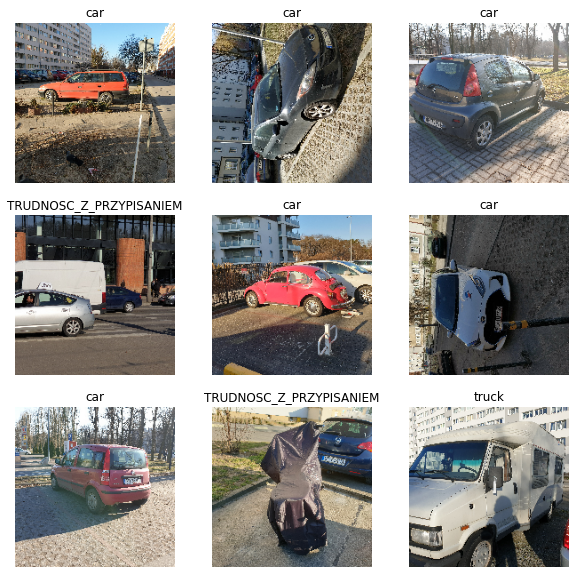

In [ ]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

Fit the model

In [ ]:
num_classes = 6

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
8/8 [==============================] - 17s 2s/step - loss: 1.7733 - accuracy: 0.4508 - val_loss: 1.6552 - val_accuracy: 0.4262
Epoch 2/3
8/8 [==============================] - 9s 1s/step - loss: 1.4570 - accuracy: 0.5287 - val_loss: 1.6102 - val_accuracy: 0.4262
Epoch 3/3
8/8 [==============================] - 9s 1s/step - loss: 1.4145 - accuracy: 0.5287 - val_loss: 1.6440 - val_accuracy: 0.4262
